In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg

from src.simpleEDMD import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Reconstruct FIG2

In [2]:
def analytical_koopman_eigenfunction(x,y,i,j):
    return np.power((x-y)/np.sqrt(2),i)*np.power(y,j)

def analytical_koopman_eigenvalue(i,j):
    return np.power(0.9,i)*np.power(0.8,j)


In [3]:
x1 = np.arange(-5, 5.1, 0.1)
x2 = np.arange(-5, 5.1, 0.1)
xx1, xx2 = np.meshgrid(x1, x2)

/Users/longtaoliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


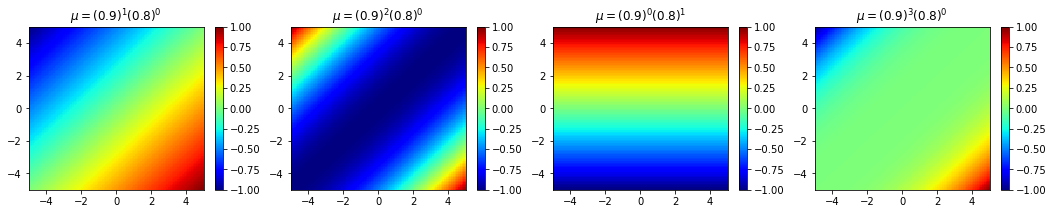

In [4]:
fig, axs = plt.subplots(1, 4,figsize=(18,3))
ij = [[1,1],[4,0],[2,1],[0,2]] #normalized to [0,1]
ij2 = [[1,0],[2,0],[0,1],[3,0]] #normalized to [-1,1]
for index, power in enumerate(ij2):
    
    i = power[0]
    j = power[1]

    z = analytical_koopman_eigenfunction(xx1,xx2,i,j)
   
    z_min, z_max, = z.min(), z.max()
    normalized_z = 2*(z-z_min)/(z_max-z_min)-1
    #normalized_z = (z-z_min)/(z_max-z_min)
    #nz_min, nz_max = normalized_z.min(), normalized_z.max()

    ax = axs[index]
    
    
    #c = ax.pcolor(x1, x2, z, cmap='jet', vmin=z_min, vmax=z_max)
    c = ax.pcolor(x1, x2, normalized_z, cmap='jet', vmin=-1, vmax=1)
    ax.set_title('$\mu = (0.9)^{}(0.8)^{}$'.format(i,j))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    fig.colorbar(c, ax=ax)


/Users/longtaoliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


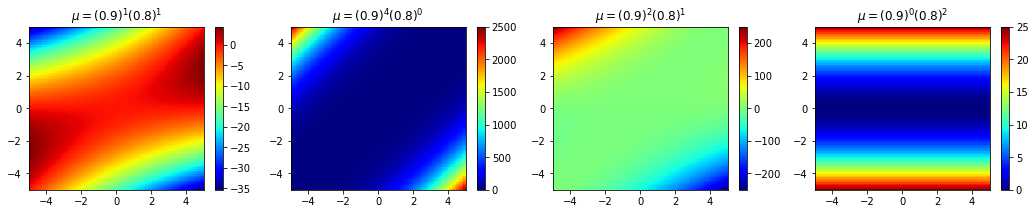

In [5]:
fig, axs = plt.subplots(1, 4,figsize=(18,3))
ij = [[1,1],[4,0],[2,1],[0,2]]
ij2 = [[1,0],[2,0],[0,1],[3,0]]
for index, power in enumerate(ij):
    
    i = power[0]
    j = power[1]

    z = analytical_koopman_eigenfunction(xx1,xx2,i,j)
    
    
    z_min, z_max, = z.min(), z.max()
    #normalized_z = 2*(z-z_min)/(z_max-z_min)-1 #[-1,1]
    normalized_z = (z-z_min)/(z_max-z_min) #[0,1]
    #nz_min, nz_max = normalized_z.min(), normalized_z.max()
    

    ax = axs[index]

    c = ax.pcolor(x1, x2, z, cmap='jet', vmin=z_min, vmax=z_max)
    #c = ax.pcolor(x1, x2, normalized_z, cmap='jet', vmin=0, vmax=1)
    ax.set_title('$\mu = (0.9)^{}(0.8)^{}$'.format(i,j))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    fig.colorbar(c, ax=ax)



# Data generation
for example4.1.1

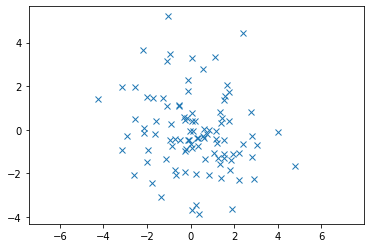

In [6]:
#generate X as 100 normally distributed initial conditions 2x100
mean = [0, 0]
cov = [[3, 0], [0, 3]]
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x1, x2, 'x')
plt.axis('equal')
plt.show()

X = []
for i in range(0,100):
    X.append([x1[i],x2[i]])
X = np.array(X)

In [7]:
#generate true Y by multiplying J
J = np.array([[0.9, -0.1],[0, 0.8]])
Y = []
for i in range(0,100):
    xi = X[i]
    yi = J@xi
    Y.append(yi)

Y = np.array(Y)

# EDMD for linear example

In [8]:
linearEDMD = simpleEDMD(X,Y)

In [9]:
linearEDMD.compute_koopman_operator()

In [10]:
Mu = linearEDMD.koopman_eigenvalues
Mu # correctly responding to eigenvalues in Fig.3

array([1.        +0.j        , 0.9       +0.j        ,
       0.81      +0.j        , 0.8       +0.j        ,
       0.729     +0.j        , 0.72      +0.j        ,
       0.6561    +0.j        , 0.648     +0.j        ,
       0.64      +0.j        , 0.5832    +0.j        ,
       0.576     +0.j        , 0.57426164+0.04955278j,
       0.57426164-0.04955278j, 0.5184    +0.j        ,
       0.512     +0.j        , 0.4608    +0.j        ,
       0.41485502+0.j        , 0.4096    +0.j        ,
       0.39675025+0.17345039j, 0.39675025-0.17345039j,
       0.3752831 +0.08927943j, 0.3752831 -0.08927943j,
       0.30689284+0.09405772j, 0.30689284-0.09405772j,
       0.1614778 +0.j        ])

In [11]:
Xi = linearEDMD.right_eigenvectors
Xi.shape

(25, 25)

In [12]:
Wstar = linearEDMD.left_eigenvectors
Wstar.shape

(25, 25)

## koopman_eigenfunction draft (WRONG)

In [13]:
ex1 = np.arange(-5, 5.1, 0.1)
ex2 = np.arange(-5, 5.1, 0.1)
#xx1, xx2 = np.meshgrid(x1, x2)

In [18]:
#plot for 2nd eigenvalue = 0.9 
#corresponding to analytical solution i = 1, j = 0
mu = np.round(Mu[1].real,4)

ez = np.zeros((len(ex1),len(ex1)))

for i,x1n in enumerate(ex1):
    for j,x2n in enumerate(ex2):
        #print(x2n)
        Psi = linearEDMD.dictionary_Hermite_poly([x1n,x2n])
  
        ez[i][j] = Psi@Xi[1].real
    


-234594.07143284456 695.3351149611667


/Users/longtaoliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


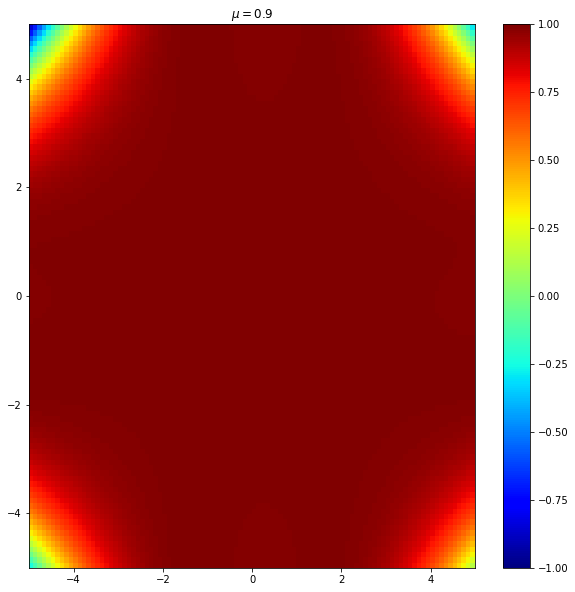

In [19]:
ez_min,ez_max = ez.min(),ez.max()
print(ez_min,ez_max)
normalized_ez = 2*(ez-ez_min)/(ez_max-ez_min)-1

fig, ax = plt.subplots(1, 1,figsize=(10,10))

#c = ax.pcolor(ex1, ex2, ez, cmap='jet', vmin=ez_min, vmax=ez_max)
c = ax.pcolor(ex1, ex2, normalized_ez, cmap='jet', vmin=-1, vmax=1)
ax.set_title('$\mu = {}$'.format(mu))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
fig.colorbar(c, ax=ax)